In [1]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Using TensorFlow backend.


In [2]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


4


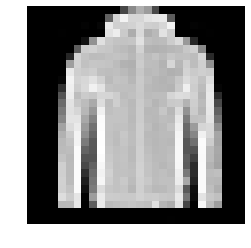

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
c = random.randint(0, 59999)
print(y_train[c])
plt.axis("off")
plt.imshow(x_train[c], cmap="gray")

In [4]:
import pandas as pd
pd.DataFrame(x_train[c])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,93,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,3,0,6,...,244,0,0,3,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,1,...,205,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,18,145,224,...,204,219,153,39,0,0,0,0,0,0
5,0,0,0,0,0,0,93,205,209,200,...,183,186,199,207,136,0,0,0,0,0
6,0,0,0,0,0,38,212,195,188,189,...,198,192,193,189,214,42,0,0,0,0
7,0,0,0,0,0,158,210,193,198,197,...,214,183,207,189,207,146,0,0,0,0
8,0,0,0,0,0,232,206,201,205,191,...,176,179,212,202,207,203,0,0,0,0
9,0,0,0,0,5,242,210,215,225,209,...,183,198,219,208,194,220,0,0,0,0


In [5]:
# 資料處理
# 1. 圖片部分 
# 把你圖轉成 0 - 1
# MLP的輸入必須是一維, 必須把她拉平
x_train_shape = x_train.reshape(60000, 784) / 255
x_test_shape = x_test.reshape(10000, 784) / 255

In [6]:
# 2. 答案部分
# 變成十個機率: 3 -> [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
print("處理前:", y_train[0])
print("處理後:", y_train_cat[0])

處理前: 9
處理後: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [7]:
# 1. 建立模型
from keras.models import Sequential
from keras.layers import Dense
mlp = Sequential()
#Param: 784 * 256 + 256(bias)
mlp.add(Dense(256, input_dim=784, activation="relu"))
#Param: 256 * 10 + 10(bias)
mlp.add(Dense(10, activation="softmax"))
mlp.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [8]:
# 2. 確定你梯度下降所用的參數
# loss 一個神經元: binary_crossentropy 兩個以上神經元: categorical_crossentropy
# (補充) 回歸 神經元 acitvation不帶入, loss="mse"
mlp.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [9]:
# 3. 訓練!!!!
# batch_size: 看幾筆調整一次W
# epochs: 整個資料集總共看幾次
# batch = 200, epochs = 10: 60000 * 10 / 200 = 3000次梯度調整
# fit到什麼時候為止呢? val_loss開始平緩就停下來
mlp.fit(x_train_shape, y_train_cat, batch_size=200, epochs=15, validation_split=0.1, verbose=2)

Train on 54000 samples, validate on 6000 samples
Epoch 1/15
 - 2s - loss: 0.5585 - acc: 0.8090 - val_loss: 0.4396 - val_acc: 0.8367
Epoch 2/15
 - 1s - loss: 0.4048 - acc: 0.8583 - val_loss: 0.3845 - val_acc: 0.8685
Epoch 3/15
 - 1s - loss: 0.3645 - acc: 0.8693 - val_loss: 0.3552 - val_acc: 0.8717
Epoch 4/15
 - 1s - loss: 0.3330 - acc: 0.8805 - val_loss: 0.3472 - val_acc: 0.8787
Epoch 5/15
 - 1s - loss: 0.3114 - acc: 0.8890 - val_loss: 0.3393 - val_acc: 0.8773
Epoch 6/15
 - 1s - loss: 0.3004 - acc: 0.8920 - val_loss: 0.3551 - val_acc: 0.8712
Epoch 7/15
 - 1s - loss: 0.2846 - acc: 0.8961 - val_loss: 0.3336 - val_acc: 0.8790
Epoch 8/15
 - 1s - loss: 0.2768 - acc: 0.8993 - val_loss: 0.3191 - val_acc: 0.8852
Epoch 9/15
 - 1s - loss: 0.2638 - acc: 0.9034 - val_loss: 0.3178 - val_acc: 0.8875
Epoch 10/15
 - 1s - loss: 0.2520 - acc: 0.9071 - val_loss: 0.3274 - val_acc: 0.8835
Epoch 11/15
 - 1s - loss: 0.2451 - acc: 0.9119 - val_loss: 0.3255 - val_acc: 0.8797
Epoch 12/15
 - 1s - loss: 0.2363 - a

In [10]:
mlp.predict_classes(x_test_shape)

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [11]:
# 不用再自己accuracy_score, 你可以使用evaluate
mlp.evaluate(x_test_shape, y_test_cat)

10000/10000 [==============================] - 0s 15us/step


[0.32826252465248107, 0.8863]

In [12]:
from sklearn.metrics import confusion_matrix
pre = mlp.predict_classes(x_test_shape)
pd.DataFrame(confusion_matrix(y_test, pre))

,0,1,2,3,4,5,6,7,8,9
0,851,1,12,13,3,0,110,0,10,0
1,4,970,1,18,2,0,4,0,1,0
2,22,0,816,8,92,0,58,0,4,0
3,27,4,20,878,38,0,28,0,5,0
4,1,1,108,22,806,0,59,0,3,0
5,0,0,0,1,0,952,0,29,1,17
6,131,0,83,23,63,0,685,0,15,0
7,0,0,0,0,0,5,0,976,0,19
8,6,0,4,3,5,1,1,5,975,0
9,0,0,0,0,0,6,1,39,0,954


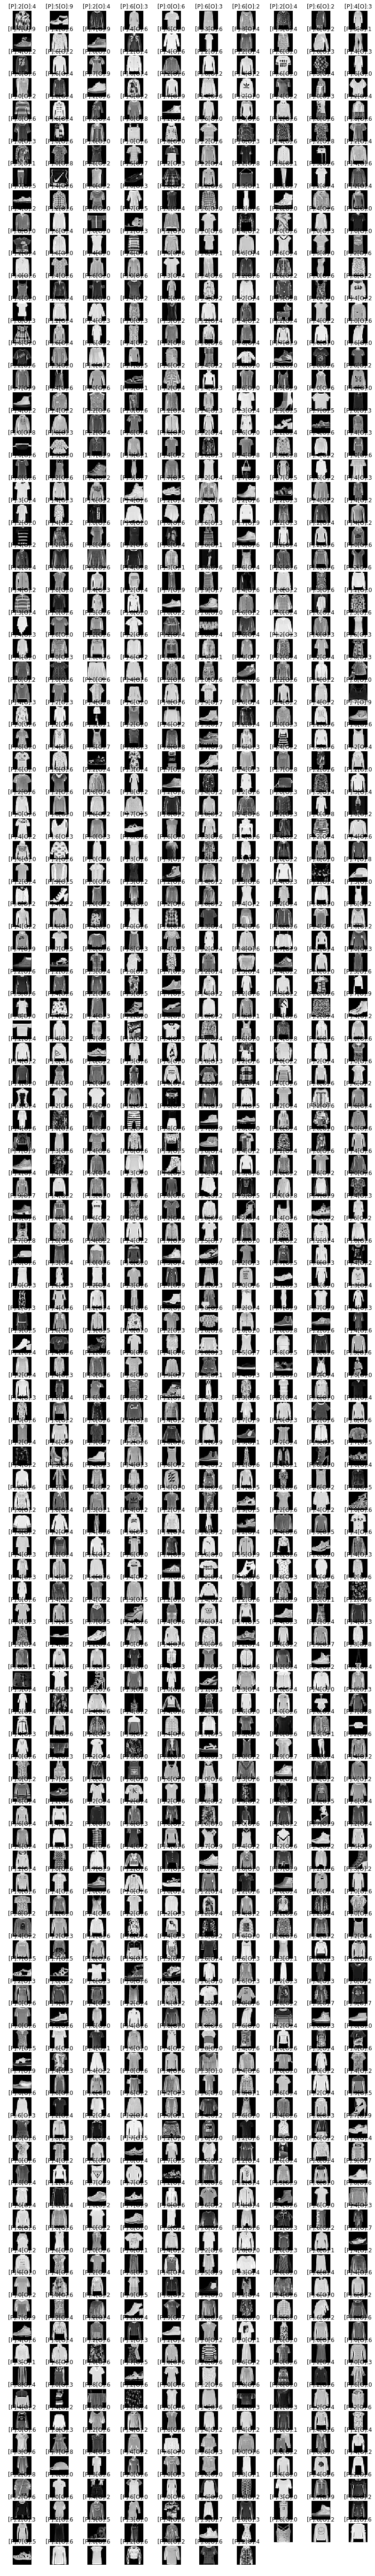

In [13]:
import numpy as np
idxs = np.nonzero(pre != y_test)[0]
# ["a", "b", "c"]
# for in : a -> b -> c
# for in enumerate : (0, a) -> (1, b) -> (2, c)
plt.figure(figsize=(14, 100))
width = 10
height = int(len(idxs) / width) + 1
falsepre = pre[idxs]
falseori = y_test[idxs]
for (i, img) in enumerate(x_test[idxs]):
    plt.subplot(height, width, i + 1)
    t = "[P]:" + str(falsepre[i]) + "[O]:" + str(falseori[i])
    plt.title(t)
    plt.axis("off")
    plt.imshow(img, cmap="gray")

In [14]:
print("預測錯誤標籤:", pre[idxs])
print("正確標籤:", y_test[idxs])

預測錯誤標籤: [2 5 2 ... 6 0 2]
正確標籤: [4 9 4 ... 2 6 4]


In [21]:
# # 兩大圖像處理函式庫(PIL, opencv)
# # PIL幫我安裝Pillow
# # !!! 再用的時候所有東西都轉成np array
# from PIL import Image, ImageOps
# fn = input("請輸入檔名:")
# oriimg = Image.open(fn).convert("L")
# o = ImageOps.invert(oriimg)
# o
# img = o.resize((28, 28))
# img_shape = np.array(img).reshape(784) / 255
# print("預測結果:", mlp.predict_classes(np.array([img_shape])))
# img

In [20]:
# # 兩大圖像處理函式庫(PIL, opencv)
# # PIL幫我安裝Pillow
# # !!! 再用的時候所有東西都轉成np array
# from PIL import Image
# fn = input("請輸入檔名:")
# oriimg = Image.open(fn).convert("L")
# img = oriimg.resize((28, 28))
# img_shape = np.array(img).reshape(784) / 255
# print("預測結果:", mlp.predict_classes(np.array([img_shape])))
# oriimg

In [29]:
# 兩大圖像處理函式庫(PIL, opencv)
# PIL幫我安裝Pillow
# !!! 再用的時候所有東西都轉成np array
from PIL import Image, ImageOps
plp = []
for nm in range(665):
    
    try:
        fn = "T_shirt2/" + str(nm+1) + ".jpg"
        oriimg = Image.open(fn).convert("L")
        o = ImageOps.invert(oriimg)
        o
        img = o.resize((28, 28))
        img_shape = np.array(img).reshape(784) / 255
    #     print("預測結果:", mlp.predict_classes(np.array([img_shape])))
        ppp = mlp.predict_classes(np.array([img_shape]))
        ppp = ppp.item()
        if ppp == 0:
            plp.append(ppp)
    
    
    except:
        pass
# print(plp)
# print(img_shape)
len(plp)/100
# 100張T-shirt的準確率

0.81

In [32]:
# 兩大圖像處理函式庫(PIL, opencv)
# PIL幫我安裝Pillow
# !!! 再用的時候所有東西都轉成np array
from PIL import Image, ImageOps
plp = []
for nm in range(2468):
    
    try:
        fn = "dress2/" + str(nm+1) + ".jpg"
        oriimg = Image.open(fn).convert("L")
        o = ImageOps.invert(oriimg)
        o
        img = o.resize((28, 28))
        img_shape = np.array(img).reshape(784) / 255
    #     print("預測結果:", mlp.predict_classes(np.array([img_shape])))
        ppp = mlp.predict_classes(np.array([img_shape]))
        ppp = ppp.item()
#         if ppp == 2:
        plp.append(ppp)
    
    
    except:
        pass
print(plp)
# print(img_shape)
# len(plp)/100
# 洋裝預測結果

[4, 3, 6, 8, 3, 3, 3, 8, 0, 3, 1, 8, 3, 7, 0, 8, 7, 1, 5, 3, 1, 3, 3, 0, 3, 3, 8, 3, 8, 8, 8, 8, 8, 9, 3, 3, 3, 3, 3, 8, 0, 7, 4, 3, 1, 3, 6, 3, 6, 1, 0, 3, 3, 3, 0, 3, 8, 0, 3, 8, 1, 3, 0, 1, 8, 3, 1, 9, 0, 8, 3, 3, 7, 8, 6, 2, 3, 3, 5, 1, 1, 3, 8, 3, 1, 1, 1, 8, 8, 8, 8, 8, 8, 4, 8, 3, 3, 8, 4, 8]


1.0

In [ ]:
# from keras.models import load_model
# load = load_model("fashion_mnist_model.h5")
